In [391]:
import os
import numpy as np
import pandas as pd

from scipy.spatial.distance import cdist

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn") # pretty matplotlib plots

import warnings
warnings.filterwarnings('ignore')

In [405]:
def initialize_dataset():
    """
    initialize_dataset desctiption

    Returns
    -------
    data_list: numpy.ndarray
    
    data_list: numpy.ndarray
        
    """
    data_list = []
    label_list = []
    # path to data
    filenames = os.listdir(os.getcwd()+"/data/")

    for filename in filenames:
        if not filename.startswith("."):
            
            subject_id = os.path.basename(filename).strip("sub_.csv")
            df = pd.read_csv(os.getcwd()+"/data/"+filename)
            grouped = df.groupby(["chunk","label"])
            grouped_list = []
            labels = []

            for tuple, group in grouped:
                data = group.drop(columns=["chunk","label"]).to_numpy(dtype=np.float32)
                grouped_list.append(data)
                labels.append(tuple[0])

            data_list.append(grouped_list)
            label_list.append(labels)

    return np.array(data_list), np.array(label_list)

In [406]:
data_list, label_list = initialize_dataset()

9


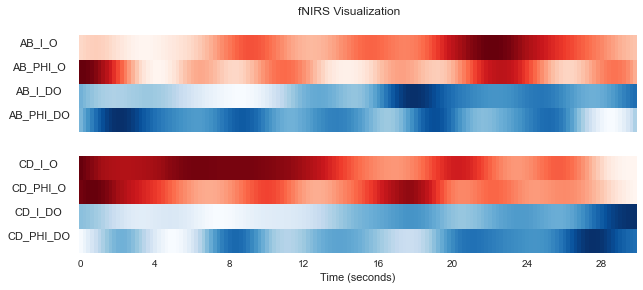

In [410]:
def plot(data):
    # initialize figure
    fig, axs = plt.subplots(9, 1,figsize=(10, 4), sharey=True, sharex=True, gridspec_kw={"wspace":0, "hspace":0}, squeeze=True)
    cmaps = ["Reds","Reds","Blues","Blues"]
    for i in range(8):
        index = i if i<4 else i+1
        axs[index].imshow(data[:][i].reshape(1,len(data[:][i])), cmap=cmaps[i%4], aspect="auto")
    axs[4].imshow(np.zeros((1,len(data[:][i]))), vmax=1, vmin=0, cmap="binary", aspect="auto")
    # set graph axis
    axs[8].set_xlabel("Time (seconds)")
    # divide axis by 5
    a = axs[8].get_xticks().tolist()
    a = [int(i/5) for i in a]
    axs[8].set_xticklabels(a)
    yaxis = ["AB_I_O","AB_PHI_O","AB_I_DO","AB_PHI_DO","","CD_I_O","CD_PHI_O","CD_I_DO","CD_PHI_DO"]
    for i in range(9):
        axs[i].grid(False)
        axs[i].set_yticks([])
        axs[i].set_ylabel(yaxis[i], rotation=0, labelpad=40, loc="center")
    fig.suptitle("fNIRS Visualization")
    # return figure
    return fig

# sample and scale data
trial = 9
sample = data_list[0][trial].T
print(label_list[0][trial])
vmax = np.max(sample.flatten())
vmin = np.min(sample.flatten())
sample_std = (sample - vmin) / (vmax - vmin)
sample_scaled = sample_std * (vmax - vmin) + vmin
fig = plot(sample_scaled)